## Observations and Insights 

* From our regression analysis towards the end of the document, there is a strong positive correlation between tumor volume and mouse weights. That is, the more a mouse weighs, the higher the average tumor volume. This is evident from the regression model as well as the correlation coefficient of 0.84.
* Our data contains a nearly equal number of male and female mice. This helps to eliminate potential bias involving gender. For example, a study of nearly all male mice likely won't be representative of the entire population.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_data["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data.loc[mouse_data.duplicated(subset = ['Mouse ID','Timepoint'], keep = False), 'Mouse ID']
duplicate_ID = duplicate_mice.unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = mouse_data.loc[mouse_data['Mouse ID'] == 'g989']
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_data[mouse_data['Mouse ID'].isin(duplicate_ID) == False]
cleaned_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_mouse_data['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_regimen = cleaned_mouse_data.groupby(cleaned_mouse_data['Drug Regimen'])['Tumor Volume (mm3)']

mean = grouped_regimen.mean()
med = grouped_regimen.median()
var = grouped_regimen.var()
std = grouped_regimen.std()
sem = grouped_regimen.sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({'Mean (Tumor Volume)': mean,
                 'Median (Tumor Volume)': med,
                 'Variance (Tumor Volume)': var,
                 'Standard Deviation (Tumor Volume)': std,
                 'Standard Error (Tumor Volume)': sem})

# Display diataframe
summary_stats


,Mean (Tumor Volume),Median (Tumor Volume),Variance (Tumor Volume),Standard Deviation (Tumor Volume),Standard Error (Tumor Volume)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = grouped_regimen.agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

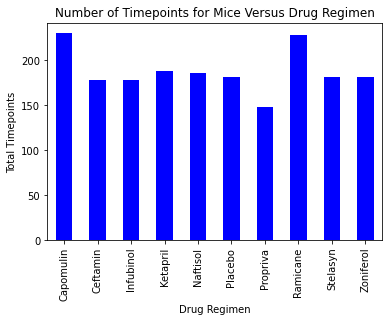

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_data = cleaned_mouse_data.groupby(['Drug Regimen'])['Timepoint'].count()

bar_pandas = bar_data.plot(kind = 'bar', color = 'blue')
bar_pandas.set_title("Number of Timepoints for Mice Versus Drug Regimen")
bar_pandas.set_xlabel("Drug Regimen")
bar_pandas.set_ylabel("Total Timepoints")
plt.show()


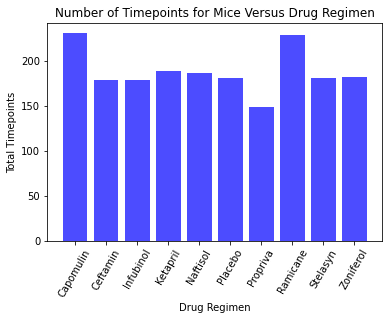

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(bar_data))
x_axis
plt.bar(x_axis, bar_data, color = 'b', alpha = 0.7, align = 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, bar_data.index, rotation = 60)

plt.title("Number of Timepoints for Mice Versus Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")

plt.show()

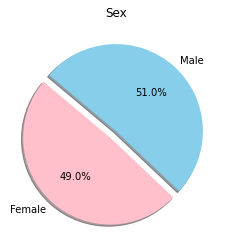

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_df = cleaned_mouse_data.groupby(['Sex'])['Mouse ID'].count()
colors = ['pink', 'skyblue']
explode = [0.1,0]
sex_pie_chart = sex_df.plot(kind = 'pie', shadow = True, explode = explode, colors = colors, autopct = '%1.1f%%', startangle = 140)
sex_pie_chart.set_ylabel('')
sex_pie_chart.set_title('Sex')
plt.show()


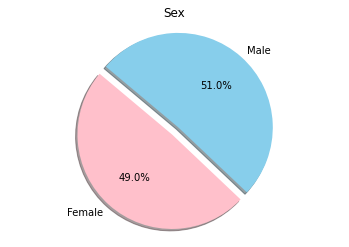

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plt.pie(sex_df, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = cleaned_mouse_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = cleaned_mouse_data.merge(greatest_timepoint, on = ['Mouse ID', 'Timepoint'])
tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_list=[]
          
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug_regimen in regimen_list:
    drug_regimen_df = tumor_df.loc[(tumor_df['Drug Regimen'] == drug_regimen)]
    
    # add subset 
    tumor_list.append(drug_regimen_df['Tumor Volume (mm3)'])
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
i = 0
for drug in regimen_list:
    
    if i >= 0:
        lowerq = round(np.quantile(tumor_list[i], 0.25),2)
        upperq = round(np.quantile(tumor_list[i], 0.75),2)
        iqr = round(upperq - lowerq,2)
        median = round(np.quantile(tumor_list[i], 0.5),2)
        lower_bound = round(lowerq - (1.5 * iqr),2)  
        upper_bound = round(upperq + (1.5 * iqr),2)
        i += 1

        print(f'The lower quartile for {drug} is {lowerq}.')
        print(f'The upper quartile for {drug} is {upperq}.')
        print(f'The interquartile range for {drug} is {iqr}.')
        print(f'The median for {drug} is {median}.')
        print(f'Values below {lower_bound} may be outliers for {drug}.')
        print(f'Values above {upper_bound} may be outliers for {drug}.')
        print('-------------------------------------------------------------')



The lower quartile for Capomulin is 32.38.
The upper quartile for Capomulin is 40.16.
The interquartile range for Capomulin is 7.78.
The median for Capomulin is 38.13.
Values below 20.71 may be outliers for Capomulin.
Values above 51.83 may be outliers for Capomulin.
-------------------------------------------------------------
The lower quartile for Ramicane is 31.56.
The upper quartile for Ramicane is 40.66.
The interquartile range for Ramicane is 9.1.
The median for Ramicane is 36.56.
Values below 17.91 may be outliers for Ramicane.
Values above 54.31 may be outliers for Ramicane.
-------------------------------------------------------------
The lower quartile for Infubinol is 54.05.
The upper quartile for Infubinol is 65.53.
The interquartile range for Infubinol is 11.48.
The median for Infubinol is 60.17.
Values below 36.83 may be outliers for Infubinol.
Values above 82.75 may be outliers for Infubinol.
-------------------------------------------------------------
The lower quarti

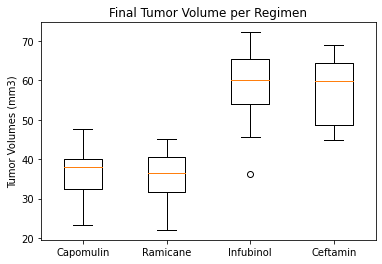

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Regimen')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(tumor_list, labels = regimen_list)
plt.show()

## Line and Scatter Plots

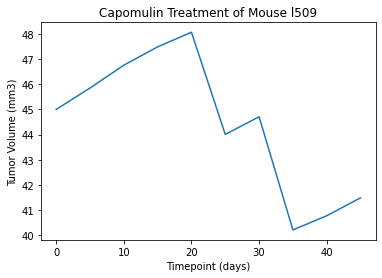

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_tumor_df = cleaned_mouse_data.loc[(cleaned_mouse_data['Drug Regimen'] == 'Capomulin')]
line_data = capomulin_tumor_df.loc[(capomulin_tumor_df['Mouse ID'] == 'l509')]
line_data
x_values = line_data['Timepoint']
y_values = line_data['Tumor Volume (mm3)']
plt.plot(x_values, y_values)
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

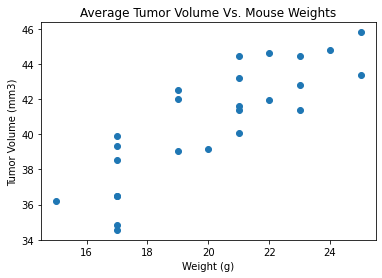

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumor_volume = cleaned_mouse_data.loc[(cleaned_mouse_data['Drug Regimen'] == 'Capomulin')].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = cleaned_mouse_data.loc[(cleaned_mouse_data['Drug Regimen'] == 'Capomulin')].groupby('Mouse ID')['Weight (g)'].min()

x_values = mouse_weight
y_values = average_tumor_volume
plt.scatter(x_values, y_values)
plt.title('Average Tumor Volume Vs. Mouse Weights')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

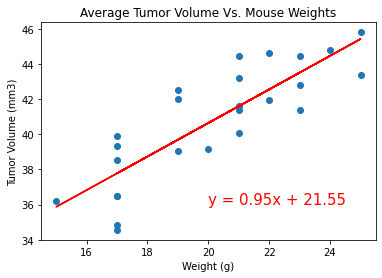

The correlation coefficient is 0.84.


In [19]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = mouse_weight
y_values = average_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize = 15, color = "red")
plt.title('Average Tumor Volume Vs. Mouse Weights')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

# Display the correlation coefficient
print(f"The correlation coefficient is {round(rvalue,2)}.")